# Notebook 01 — Data Collection & Preparation
### Adaptive Statistical Arbitrage — Ayush Arora (MQMS2404)

In this notebook, we:
- Build the NIFTY 100 universe  
- Download 10 years of historical daily prices  
- Clean missing values  
- Validate the data visually  
- Save the cleaned dataset for future analysis  


In [1]:
import yfinance as yf            # Download historical stock data
import pandas as pd              # Data manipulation
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Visualization

plt.style.use("seaborn-v0_8")    # Clean visual style

## Step 2: Define the NIFTY 100 Stock Universe
We use NIFTY 100 because it is liquid, diverse, and ideal for discovering cointegrated pairs.

In [2]:
tickers = [
    "RELIANCE.NS","TCS.NS","HDFCBANK.NS","ICICIBANK.NS","INFY.NS","KOTAKBANK.NS",
    "AXISBANK.NS","SBIN.NS","ITC.NS","HINDUNILVR.NS","BHARTIARTL.NS","LT.NS",
    "MARUTI.NS","M&M.NS","HEROMOTOCO.NS","BAJAJ-AUTO.NS","ULTRACEMCO.NS",
    "TATASTEEL.NS","JSWSTEEL.NS","ASIANPAINT.NS","BAJFINANCE.NS","BAJAJFINSV.NS",
    "POWERGRID.NS","NTPC.NS","COALINDIA.NS","GRASIM.NS","TITAN.NS","SUNPHARMA.NS",
    "DRREDDY.NS","DIVISLAB.NS","NESTLEIND.NS","BRITANNIA.NS","WIPRO.NS","HCLTECH.NS",
    "TECHM.NS","HAVELLS.NS","PIDILITIND.NS","GODREJCP.NS","DABUR.NS",
    "ICICIPRULI.NS","ICICIGI.NS","HDFCLIFE.NS","BAJAJHLDNG.NS","MUTHOOTFIN.NS",
    "ADANIPORTS.NS","ADANIENT.NS","ADANIGREEN.NS","ADANITRANS.NS","ONGC.NS",
    "OIL.NS","BPCL.NS","IOC.NS","BHARATFORG.NS","EICHERMOT.NS","SHREECEM.NS",
    "AMBUJACEM.NS","PIDILITIND.NS","TATAMOTORS.NS","TATAPOWER.NS","TATACONSUM.NS",
    "CHOLAFIN.NS","PEL.NS","LUPIN.NS","CIPLA.NS","APOLLOHOSP.NS","TORNTPHARM.NS",
    "AUROPHARMA.NS","BERGEPAINT.NS","COLPAL.NS","UBL.NS","HDFCAMC.NS",
    "LICI.NS","GAIL.NS","ZOMATO.NS","PAYTM.NS","HINDALCO.NS","VEDL.NS",
    "INDUSINDBK.NS","YESBANK.NS","CANBK.NS","BANKBARODA.NS","IDFCFIRSTB.NS",
    "JINDALSTEL.NS","SRF.NS","ABB.NS","SIEMENS.NS","TATACHEM.NS","IRCTC.NS",
    "TVSMOTOR.NS","ASHOKLEY.NS","BOSCHLTD.NS","BHEL.NS"
]

len(tickers)

92

## Step 3: Download Historical Daily Closing Prices

In [9]:
data = yf.download(
    tickers,
    start="2015-01-01",
    end="2025-01-01"
)["Close"]

data.head()

C:\Users\arora\AppData\Local\Temp\ipykernel_29152\2509248328.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[                       0%                       ]

[*********************100%***********************]  91 of 91 completed

5 Failed downloads:
['PEL.NS', 'ZOMATO.NS', 'ADANITRANS.NS']: YFTzMissingError('possibly delisted; no timezone found')
['TATAMOTORS.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2025-01-01) (Yahoo error = "No data found, symbol may be delisted")')
['JSWSTEEL.NS']: Timeout('Failed to perform, curl: (28) Operation timed out after 10004 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Ticker,ABB.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASHOKLEY.NS,ASIANPAINT.NS,AUROPHARMA.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,TVSMOTOR.NS,UBL.NS,ULTRACEMCO.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZOMATO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1131.143555,70.761368,NaN,301.772858,NaN,195.773010,1084.179443,21.544609,684.931519,532.220825,...,462.629211,362.723755,494.190887,259.655640,808.554321,2548.028809,70.611023,93.508202,147.012466,NaN
2015-01-02,1119.410767,71.107956,NaN,301.584015,NaN,198.523697,1086.056763,22.124655,708.611450,534.770630,...,464.893738,365.588867,514.467468,250.206802,809.523132,2624.206299,71.593277,94.337654,150.751801,NaN
2015-01-05,1119.671143,72.284912,NaN,305.786499,NaN,198.265808,1089.667969,23.947659,708.565674,534.510925,...,457.137390,368.549469,512.181091,253.434326,806.907471,2629.565430,70.788124,94.506927,151.075287,NaN
2015-01-06,1109.502930,71.736145,NaN,303.944946,NaN,190.959244,1057.216675,23.429758,691.651550,513.663208,...,452.233887,355.943024,488.625580,250.768112,806.471375,2555.780762,67.326019,92.297890,146.841232,NaN
2015-01-07,1093.510986,71.100731,NaN,303.236633,NaN,189.197098,1065.498047,24.714153,705.548523,521.808777,...,450.120850,357.757568,486.015625,260.357208,869.103821,2545.683594,67.309937,91.595375,144.119995,NaN


## Step 4: Data Cleaning

In [10]:
valid_cols = data.columns[data.isnull().mean() < 0.20]
data = data[valid_cols]

print("Stocks kept after cleaning:", len(valid_cols))

Stocks kept after cleaning: 79


In [11]:
data = data.ffill().bfill()  # Fill missing values forward & backward

## Step 5: Visualize a Few Stocks

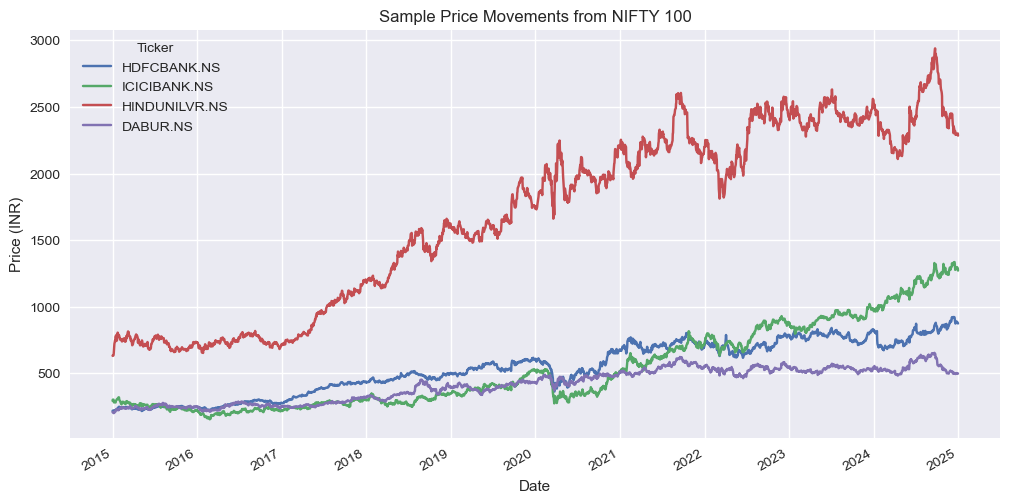

In [12]:
sample = ["HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "DABUR.NS"]
data[sample].plot(figsize=(12,6), title="Sample Price Movements from NIFTY 100")
plt.ylabel("Price (INR)")
plt.show()

## Step 6: Save Cleaned Dataset

In [13]:
data.to_csv("data/prices.csv")
print("Data successfully saved to: data/prices.csv")

Data successfully saved to: data/prices.csv
